<a href="https://colab.research.google.com/github/Rahma-Alam-Samiha/CreditCardFraud-Analysis-CNN/blob/main/Credit_Card_Fraud_Analysis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [ ]:
## importing all libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D

# Data processing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

print(tf.__version__)

2.14.0


In [ ]:
data=df.copy()

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
130921,79460.0,1.208975,-0.374580,1.121914,-0.594707,-1.519022,-1.142859,-0.598901,-0.035769,1.869066,...,0.016247,0.266766,0.036762,0.926674,0.410396,-0.717703,0.090713,0.039497,1.00,0
217930,141098.0,2.062835,-0.164722,-2.285440,0.192614,0.625128,-1.030814,0.637804,-0.406095,0.331557,...,0.086062,0.264976,-0.058191,0.538521,0.361950,0.808577,-0.142584,-0.076617,49.95,0
73811,55289.0,-0.382804,0.155714,1.906206,-0.834482,-0.670147,-0.110069,-0.318735,0.189059,-1.629484,...,0.046289,-0.098531,-0.030599,0.194986,-0.072939,-0.307902,-0.125077,-0.005561,6.18,0
250318,154840.0,1.982705,0.156363,-1.972221,1.194654,0.984587,-0.415818,0.727268,-0.379957,0.017734,...,0.056842,0.314290,-0.079933,0.310115,0.565842,-0.504275,-0.020503,-0.048772,55.12,0
106619,70040.0,-6.453240,2.925061,-4.402015,-1.152111,-0.434548,3.047556,-1.127072,3.171961,1.247083,...,-0.741439,-1.406923,-0.510218,0.966144,0.526504,-0.020565,-0.330082,-0.617950,89.99,0


In [ ]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
non_fraud=data[data["Class"]==0] ## Classifying fraud to 1 and non_fraud data to 0
fraud=data[data["Class"]==1]

In [ ]:
non_fraud.shape

(284315, 31)

In [ ]:
fraud.shape

(492, 31)

In [ ]:
non_fraud_sample=non_fraud.sample(fraud.shape[0])
non_fraud_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
110815,71987.0,1.099691,-1.814126,1.313962,-1.234742,-2.473045,-0.221397,-1.629278,0.117964,-1.509621,...,0.233767,0.709698,-0.125876,0.542322,0.086635,-0.087479,0.050085,0.057271,170.00,0
107908,70672.0,1.181932,0.113577,0.835296,1.402147,-0.806436,-0.764657,-0.141688,-0.020745,0.674659,...,-0.267177,-0.643254,0.103402,0.665616,0.410700,-0.560343,0.033017,0.027539,1.00,0
141675,84460.0,1.345297,-0.398143,0.320764,-1.052253,-0.542867,-0.027962,-0.613863,0.065959,1.942782,...,-0.106309,-0.057249,-0.206687,-0.997458,0.681315,-0.599208,0.090715,0.020739,1.00,0
26047,33886.0,-2.773562,1.402950,-0.345319,-0.153991,-0.665671,1.431792,0.581937,-0.926787,0.283672,...,1.376842,0.071180,0.477608,-0.647740,-0.354352,0.447230,0.904009,0.151131,225.00,0
239073,149945.0,-0.531642,1.117861,2.024598,2.724527,0.316196,0.202195,0.497664,0.201059,-1.242584,...,0.286100,0.669639,-0.120034,-0.015068,-0.410001,-0.045951,0.137953,0.175629,25.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174114,121775.0,-0.808499,0.978087,-0.583870,-1.012673,1.915964,-0.969394,1.626538,-0.272332,-1.057463,...,0.179623,0.494995,-0.380654,0.695966,0.542906,0.561587,-0.142182,0.157838,24.65,0
142890,84999.0,1.263325,0.263898,0.032631,0.418410,-0.007500,-0.362881,-0.054881,0.006668,-0.129058,...,-0.285550,-0.871209,0.036676,-0.406474,0.266774,0.120843,-0.029820,0.012790,0.89,0
155415,105364.0,2.055073,0.018298,-1.862287,0.565951,0.603910,-0.874232,0.445397,-0.429252,1.943172,...,-0.129396,-0.004871,0.004918,0.531934,0.412578,-0.237346,-0.081532,-0.066751,33.00,0
251929,155570.0,-0.181603,1.350858,-0.840566,-0.559435,0.776354,-0.736292,0.703222,0.268578,-0.362035,...,-0.298597,-0.799097,0.124759,0.396956,-0.330487,0.124247,0.101629,0.022856,9.12,0


In [ ]:
bal_data=fraud.append(non_fraud_sample,ignore_index=True) ## making the size of fraud and non_fraud data same
bal_data

<ipython-input-14-6077e61c7381>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_data=fraud.append(non_fraud_sample,ignore_index=True) ## making the size of fraud and non_fraud data same


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,121775.0,-0.808499,0.978087,-0.583870,-1.012673,1.915964,-0.969394,1.626538,-0.272332,-1.057463,...,0.179623,0.494995,-0.380654,0.695966,0.542906,0.561587,-0.142182,0.157838,24.65,0
980,84999.0,1.263325,0.263898,0.032631,0.418410,-0.007500,-0.362881,-0.054881,0.006668,-0.129058,...,-0.285550,-0.871209,0.036676,-0.406474,0.266774,0.120843,-0.029820,0.012790,0.89,0
981,105364.0,2.055073,0.018298,-1.862287,0.565951,0.603910,-0.874232,0.445397,-0.429252,1.943172,...,-0.129396,-0.004871,0.004918,0.531934,0.412578,-0.237346,-0.081532,-0.066751,33.00,0
982,155570.0,-0.181603,1.350858,-0.840566,-0.559435,0.776354,-0.736292,0.703222,0.268578,-0.362035,...,-0.298597,-0.799097,0.124759,0.396956,-0.330487,0.124247,0.101629,0.022856,9.12,0


In [ ]:
bal_data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
features=bal_data.drop("Class",axis=1)
labels=bal_data["Class"]

In [ ]:
feature_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=.25,random_state=41,stratify=labels)

In [ ]:
feature_train.shape


(738, 30)

In [ ]:
features_test.shape

(246, 30)

In [ ]:
labels_test.value_counts()

1    123
0    123
Name: Class, dtype: int64

In [ ]:
feature_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
234,70229.0,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,-1.657635,...,0.388885,0.345921,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064,3.79
141,42247.0,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,-0.162797,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00
871,155260.0,-0.814616,1.356126,-0.098406,-1.028600,0.598596,-0.567838,1.048549,-0.184643,0.653969,...,0.541075,-0.402454,-0.571420,0.037539,-0.422271,-0.312954,0.136971,0.496227,0.129861,8.95
143,42985.0,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,0.058861,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00
65,26863.0,-21.209120,12.652197,-23.553933,6.174078,-16.026658,-4.422195,-16.229444,14.116002,-3.922741,...,1.602439,1.758440,-1.522588,-0.903860,0.130166,1.454857,-0.223214,1.550928,0.461460,99.99


In [ ]:
##Scaling the database
scale=StandardScaler()
feature_train=scale.fit_transform(feature_train)
features_test=scale.fit_transform(features_test)

In [ ]:
##Converting features into data frame
feature_train=pd.DataFrame(feature_train)
features_test=pd.DataFrame(features_test)

In [ ]:
feature_train=feature_train.to_numpy()
features_test=features_test.to_numpy()

In [ ]:
feature_train=feature_train.reshape(feature_train.shape[0],feature_train.shape[1],1)

In [ ]:
features_test = features_test.reshape(features_test.shape[0],features_test.shape[1],1)

In [ ]:
feature_train.shape , features_test.shape

((738, 30, 1), (246, 30, 1))

In [ ]:
#Building CNN
epochs=50
model=Sequential()

#first layer

model.add(Conv1D(32,2, activation='relu',input_shape=feature_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2)) ## to prevent overfitting


In [ ]:
## second layer

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) ## to prevent overfitting

In [ ]:
## Flattening the layer
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))


In [ ]:
## Final Layer

model.add(Dense(1, activation='sigmoid')) ##for binary classification

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [ ]:
#optimizing model  to improve accuracy

model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
## Training model and calculating accuracy
history=model.fit(feature_train, labels_train, epochs=epochs, validation_data=(features_test,labels_test),verbose=1)

Epoch 1/50
24/24 [==============================] - 3s 26ms/step - loss: 0.9304 - accuracy: 0.6233 - val_loss: 0.6286 - val_accuracy: 0.8171
Epoch 2/50
24/24 [==============================] - 0s 13ms/step - loss: 0.5373 - accuracy: 0.7900 - val_loss: 0.5893 - val_accuracy: 0.8618
Epoch 3/50
24/24 [==============================] - 0s 12ms/step - loss: 0.4360 - accuracy: 0.8374 - val_loss: 0.5563 - val_accuracy: 0.9228
Epoch 4/50
24/24 [==============================] - 0s 12ms/step - loss: 0.4332 - accuracy: 0.8523 - val_loss: 0.5203 - val_accuracy: 0.9228
Epoch 5/50
24/24 [==============================] - 0s 10ms/step - loss: 0.3867 - accuracy: 0.8509 - val_loss: 0.4908 - val_accuracy: 0.9268
Epoch 6/50
24/24 [==============================] - 0s 10ms/step - loss: 0.3357 - accuracy: 0.8889 - val_loss: 0.4635 - val_accuracy: 0.9065
Epoch 7/50
24/24 [==============================] - 0s 11ms/step - loss: 0.3371 - accuracy: 0.8767 - val_loss: 0.4363 - val_accuracy: 0.8943
Epoch 8/50
24

In [ ]:
##PLOTTING CURVE
def plot_learning_curve(history,epochs):

  ##Training and validation accuracy
  epoch_range= range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("MODEL ACCURACY")
  plt.xlabel("EPOCHS")
  plt.ylabel("ACCURACY")
  plt.legend(["TRAIN","VALIDATION"],loc='upper left')
  plt.show()

  ##Training and validation loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("MODEL LOSS")
  plt.xlabel("EPOCHS")
  plt.ylabel("LOSS")
  plt.legend(["TRAIN","VALIDATION"],loc='upper left')
  plt.show()


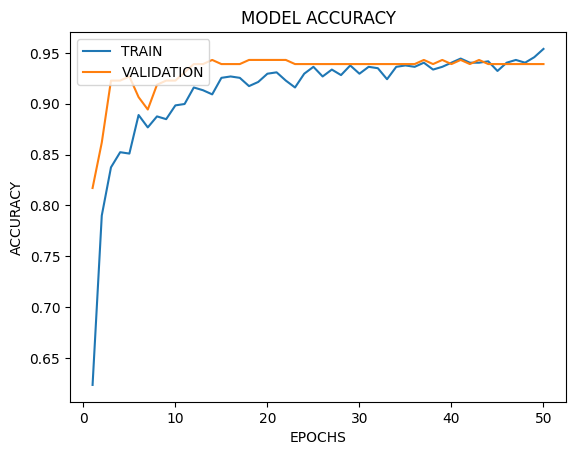

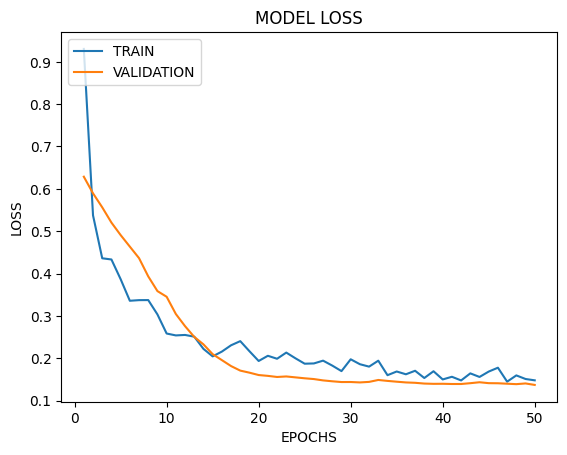

In [ ]:
plot_learning_curve(history,epochs)

In [ ]:
## ADDING MAX POOL
epochs=100
model=Sequential()

#first layer
model.add(Conv1D(64,2,activation='relu',input_shape=feature_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

In [ ]:
#second layer
model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

In [ ]:
#Flattening
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

In [ ]:
#Final Layer

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 64)            192       
                                                                 
 batch_normalization_2 (Bat  (None, 29, 64)            256       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 64)            0         
 D)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 14, 64)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 13, 64)            8256      
                                                                 
 batch_normalization_3 (Bat  (None, 13, 64)           

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(feature_train,labels_train,epochs=epochs,validation_data=(features_test,labels_test),verbose=1)

Epoch 1/100
24/24 [==============================] - 2s 19ms/step - loss: 1.1782 - accuracy: 0.5528 - val_loss: 0.6496 - val_accuracy: 0.7642
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 0.7552 - accuracy: 0.6734 - val_loss: 0.6304 - val_accuracy: 0.8171
Epoch 3/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6770 - accuracy: 0.7087 - val_loss: 0.6076 - val_accuracy: 0.8130
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6090 - accuracy: 0.7588 - val_loss: 0.5836 - val_accuracy: 0.8089
Epoch 5/100
24/24 [==============================] - 0s 9ms/step - loss: 0.5404 - accuracy: 0.7724 - val_loss: 0.5572 - val_accuracy: 0.8049
Epoch 6/100
24/24 [==============================] - 0s 9ms/step - loss: 0.4905 - accuracy: 0.8157 - val_loss: 0.5311 - val_accuracy: 0.8008
Epoch 7/100
24/24 [==============================] - 0s 9ms/step - loss: 0.4793 - accuracy: 0.8184 - val_loss: 0.5031 - val_accuracy: 0.8171
Epoch 8/100


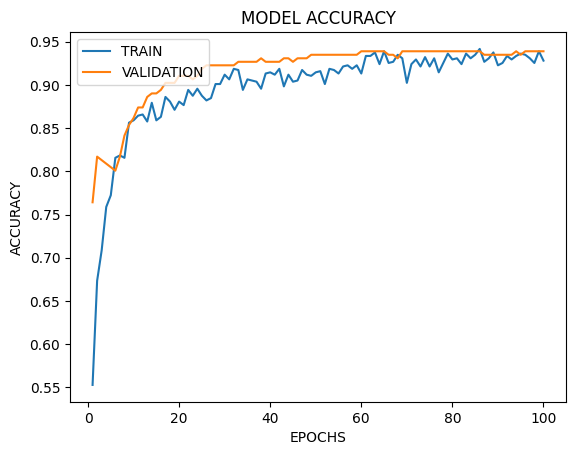

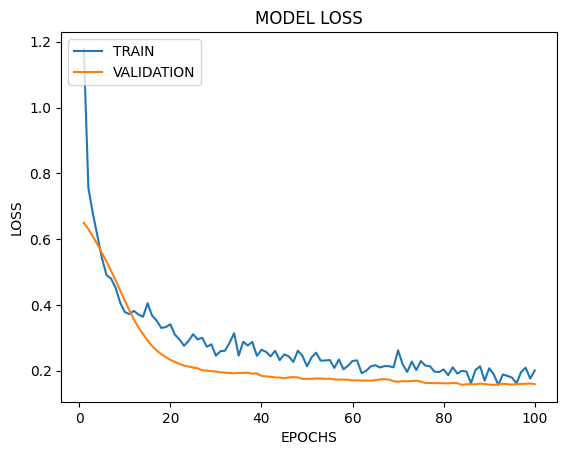

In [ ]:
plot_learning_curve(history,epochs)

In [ ]:
final_acc=model.evaluate(feature_train,labels_train)
final_acc

24/24 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.9485


[0.128029927611351, 0.9485095143318176]

In [ ]:
pred=model.predict(features_test)
pred_label = pred.argmax(axis=1)

8/8 [==============================] - 0s 3ms/step


In [ ]:
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

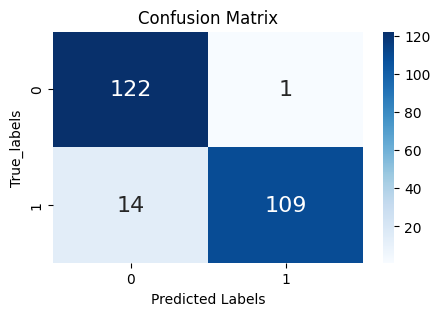

In [ ]:
cm=confusion_matrix(labels_test,pred.round())

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',annot_kws={"size":16})

plt.xlabel("Predicted Labels")
plt.ylabel("True_labels")
plt.title("Confusion Matrix")

plt.show()